In [1]:
# this notebook adds additional features to the main bulk of the game data

In [2]:
import pandas as pd

In [3]:
# get games data for last few years
games_0 = pd.read_excel('data/nhl_game_results_2023.xlsx', header=0)
games_1 = pd.read_excel('data/nhl_game_results_2024.xlsx', header=0)
games_2 = pd.read_excel('data/nhl_game_results_2025.xlsx', header=0)

# union together
all_games = pd.concat([games_0, games_1, games_2], ignore_index=True)

# reset index
all_games.reset_index(drop=True, inplace=True)

# create Game_ID column
all_games["Game_ID"] = (
    all_games["Date"].dt.strftime("%Y-%m-%d") + "-" +
    all_games["Time"].astype(str) + "|" +
    all_games["Home Team"].astype(str) + " vs " +
    all_games["Away Team"].astype(str)
)

# inspect
all_games.info()
all_games.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Game Link      3381 non-null   object        
 1   Extra Time     3381 non-null   object        
 2   Home Team      3381 non-null   object        
 3   Away Team      3381 non-null   object        
 4   Home Score     3381 non-null   int64         
 5   Away Score     3381 non-null   int64         
 6   P1 Home Score  3381 non-null   int64         
 7   P1 Away Score  3381 non-null   int64         
 8   P2 Home Score  3381 non-null   int64         
 9   P2 Away Score  3381 non-null   int64         
 10  P3 Home Score  3381 non-null   int64         
 11  P3 Away Score  3381 non-null   int64         
 12  P4 Home Score  3381 non-null   int64         
 13  P4 Away Score  3381 non-null   int64         
 14  P5 Home Score  3381 non-null   int64         
 15  P5 Away Score  3381 n

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,P4 Home Score,P4 Away Score,P5 Home Score,P5 Away Score,Time,Month_int,Date,Season,Total Score,Game_ID
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,0,0,0,0,20:00,6,2024-06-24,2023,3,2024-06-24-20:00|Florida Panthers vs Edmonton ...
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,0,0,0,0,20:00,6,2024-06-21,2023,6,2024-06-21-20:00|Edmonton Oilers vs Florida Pa...
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,0,0,0,0,20:00,6,2024-06-18,2023,8,2024-06-18-20:00|Florida Panthers vs Edmonton ...
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,0,0,0,0,20:00,6,2024-06-15,2023,9,2024-06-15-20:00|Edmonton Oilers vs Florida Pa...
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,0,0,0,0,20:00,6,2024-06-13,2023,7,2024-06-13-20:00|Edmonton Oilers vs Florida Pa...


In [4]:
# calc score at end of regular time
all_games['regular_time_score_home'] = all_games['P1 Home Score'] + all_games['P2 Home Score'] + all_games['P3 Home Score']
all_games['regular_time_score_away'] = all_games['P1 Away Score'] + all_games['P2 Away Score'] + all_games['P3 Away Score']
all_games['regular_time_score_total'] = all_games['regular_time_score_home'] + all_games['regular_time_score_away']

# calc win draw tie for regular time
all_games['Reg_Home_Win'] = all_games['regular_time_score_home'] > all_games['regular_time_score_away']
all_games['Reg_Away_Win'] = all_games['regular_time_score_home'] < all_games['regular_time_score_away']
all_games['Reg_Tie'] = all_games['regular_time_score_home'] == all_games['regular_time_score_away']

# add cols for showing the winning team at full time
all_games['FT_Home_Win'] = all_games['Home Score'] > all_games['Away Score']
all_games['FT_Away_Win'] = all_games['Home Score'] < all_games['Away Score']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Total Score,Game_ID,regular_time_score_home,regular_time_score_away,regular_time_score_total,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,3,2024-06-24-20:00|Florida Panthers vs Edmonton ...,2,1,3,True,False,False,True,False
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,6,2024-06-21-20:00|Edmonton Oilers vs Florida Pa...,5,1,6,True,False,False,True,False
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,8,2024-06-18-20:00|Florida Panthers vs Edmonton ...,3,5,8,False,True,False,False,True
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,9,2024-06-15-20:00|Edmonton Oilers vs Florida Pa...,8,1,9,True,False,False,True,False
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,7,2024-06-13-20:00|Edmonton Oilers vs Florida Pa...,3,4,7,False,True,False,False,True


In [5]:
# extract day of wee and month from date cols
all_games['Day_of_Week'] = all_games['Date'].dt.day_name()
all_games['Month'] = all_games['Date'].dt.month_name()
all_games['Week_of_Year'] = all_games['Date'].dt.isocalendar().week
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,regular_time_score_away,regular_time_score_total,Reg_Home_Win,Reg_Away_Win,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month,Week_of_Year
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,1,3,True,False,False,True,False,Monday,June,26
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,1,6,True,False,False,True,False,Friday,June,25
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,5,8,False,True,False,False,True,Tuesday,June,25
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,1,9,True,False,False,True,False,Saturday,June,24
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,4,7,False,True,False,False,True,Thursday,June,24


In [6]:
# TODO: identify generally when pre-season and post-season games occur; really only want to focus on regular season
# preseason ususally ends after 1st week of october and then regular season ends early to mid-april


In [7]:
# assign each team to its respective conference and division

# read in conf and div info
conf_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Conf')
div_map = pd.read_excel('data/NHL Team Conf Div 2025.xlsx', header=0, sheet_name='Div')

# inspect
print(conf_map.head(), '\n')
print(div_map.head())

                 Team Conference
0  Colorado Avalanche    Western
1       Anaheim Ducks    Western
2        Dallas Stars    Western
3  Chicago Blackhawks    Western
4       Winnipeg Jets    Western 

                  Team  Division
0   Montreal Canadiens  Atlantic
1        Boston Bruins  Atlantic
2  Toronto Maple Leafs  Atlantic
3      Ottawa Senators  Atlantic
4  Tampa Bay Lightning  Atlantic


In [8]:
# map home and away conf and div
all_games = all_games.merge(conf_map.rename(columns={'Team':'Home Team', 'Conference':'Home Conf'}), on='Home Team', how='left')
all_games = all_games.merge(conf_map.rename(columns={'Team':'Away Team', 'Conference':'Away Conf'}), on='Away Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Home Team', 'Division':'Home Div'}), on='Home Team', how='left')
all_games = all_games.merge(div_map.rename(columns={'Team':'Away Team', 'Division':'Away Div'}), on='Away Team', how='left')

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Reg_Tie,FT_Home_Win,FT_Away_Win,Day_of_Week,Month,Week_of_Year,Home Conf,Away Conf,Home Div,Away Div
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,False,True,False,Monday,June,26,Eastern,Western,Atlantic,Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,False,True,False,Friday,June,25,Western,Eastern,Pacific,Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,False,False,True,Tuesday,June,25,Eastern,Western,Atlantic,Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,False,True,False,Saturday,June,24,Western,Eastern,Pacific,Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,False,False,True,Thursday,June,24,Western,Eastern,Pacific,Atlantic


In [9]:
# create conf and div cols
all_games['Conf_Matchup'] = all_games['Home Conf'] == all_games['Away Conf']
all_games['Div_Matchup'] = all_games['Home Div'] == all_games['Away Div']

# create col that concats home and away conf then repeat for div
all_games['Conf_Pair'] = all_games['Home Conf'] + "-" + all_games['Away Conf']
all_games['Div_Pair'] = all_games['Home Div'] + "-" + all_games['Away Div']

# inspect
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Month,Week_of_Year,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,June,26,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,June,25,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,June,25,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,June,24,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,June,24,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic


In [10]:
# create home vs away pair
all_games['Team_Pair'] = all_games['Home Team'] + " vs " + all_games['Away Team']
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Week_of_Year,Home Conf,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,26,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,25,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,25,Eastern,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,24,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,24,Western,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers


<AxesSubplot: >

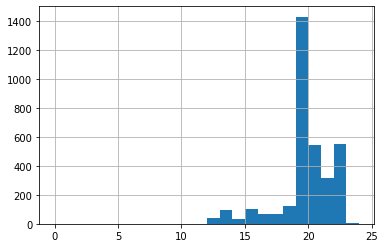

In [11]:
# split out hour part of time and get histogram of game start hours
all_games['Game_Start_Hour'] = all_games['Time'].str.split(':').str[0].astype(int)
all_games['Game_Start_Hour'].hist(bins=range(0,25))

In [12]:
# classify game time start hour
def classify_start_hour(hour):
    if 2 <= hour < 15:
        return 'Early'
    elif 15 <= hour < 20:
        return 'Mid'
    elif 20 <= hour < 24 or hour <= 1:
        return 'Late'
    else:
        return 'Unknown'

all_games['Start_Hour_Group'] = all_games['Game_Start_Hour'].apply(classify_start_hour)
all_games.head()

,Game Link,Extra Time,Home Team,Away Team,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,...,Away Conf,Home Div,Away Div,Conf_Matchup,Div_Matchup,Conf_Pair,Div_Pair,Team_Pair,Game_Start_Hour,Start_Hour_Group
0,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,2,1,1,1,1,0,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
1,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,5,1,1,0,2,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
2,https://www.flashscore.com/match/hockey/edmont...,Reg,Florida Panthers,Edmonton Oilers,3,5,0,1,2,3,...,Western,Atlantic,Pacific,False,False,Eastern-Western,Atlantic-Pacific,Florida Panthers vs Edmonton Oilers,20,Late
3,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,8,1,3,1,3,0,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late
4,https://www.flashscore.com/match/hockey/edmont...,Reg,Edmonton Oilers,Florida Panthers,3,4,0,1,1,3,...,Eastern,Pacific,Atlantic,False,False,Western-Eastern,Pacific-Atlantic,Edmonton Oilers vs Florida Panthers,20,Late


In [13]:
all_games['Start_Hour_Group'].value_counts()

Start_Hour_Group
Mid      1791
Late     1415
Early     175
Name: count, dtype: int64

In [14]:
# inspect basic stats for numeric cols
all_games.describe()

,Home Score,Away Score,P1 Home Score,P1 Away Score,P2 Home Score,P2 Away Score,P3 Home Score,P3 Away Score,P4 Home Score,P4 Away Score,...,P5 Away Score,Month_int,Date,Season,Total Score,regular_time_score_home,regular_time_score_away,regular_time_score_total,Week_of_Year,Game_Start_Hour
count,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,...,3381.000000,3381.000000,3381,3381.000000,3381.000000,3381.000000,3381.000000,3381.000000,3381.0,3381.000000
mean,3.208222,2.920438,0.922212,0.830819,1.071872,0.962733,1.102041,1.027802,0.081337,0.070689,...,0.063295,6.800946,2024-08-31 16:08:05.536823552,2023.661934,6.128660,3.096125,2.821355,5.917480,27.686483,19.261165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2023-09-23 00:00:00,2023.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,2024-01-23 00:00:00,2023.000000,5.000000,2.000000,2.000000,4.000000,10.0,19.000000
50%,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,9.000000,2024-10-19 00:00:00,2024.000000,6.000000,3.000000,3.000000,6.000000,39.0,19.000000
75%,4.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,11.000000,2025-02-25 00:00:00,2024.000000,7.000000,4.000000,4.000000,7.000000,45.0,21.000000
max,10.000000,10.000000,5.000000,6.000000,7.000000,6.000000,7.000000,6.000000,1.000000,1.000000,...,4.000000,12.000000,2025-11-11 00:00:00,2025.000000,17.000000,10.000000,10.000000,17.000000,52.0,23.000000
std,1.755752,1.716574,0.954054,0.902532,1.016074,0.970772,1.056089,1.033090,0.273392,0.256343,...,0.344206,4.173353,NaN,0.664526,2.296191,1.760998,1.700513,2.324552,18.208585,2.208134


<AxesSubplot: >

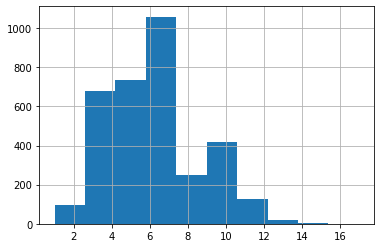

In [15]:
# inspect disttribution of Total Score using histogram
all_games['Total Score'].hist(bins=10)

In [16]:
# replace any col names that have spaces with _
col_rename_dict = {col: col.replace(' ', '_') for col in all_games.columns}

# rename acutal cols
all_games = all_games.rename(columns=col_rename_dict)
all_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Game_Link                 3381 non-null   object        
 1   Extra_Time                3381 non-null   object        
 2   Home_Team                 3381 non-null   object        
 3   Away_Team                 3381 non-null   object        
 4   Home_Score                3381 non-null   int64         
 5   Away_Score                3381 non-null   int64         
 6   P1_Home_Score             3381 non-null   int64         
 7   P1_Away_Score             3381 non-null   int64         
 8   P2_Home_Score             3381 non-null   int64         
 9   P2_Away_Score             3381 non-null   int64         
 10  P3_Home_Score             3381 non-null   int64         
 11  P3_Away_Score             3381 non-null   int64         
 12  P4_Home_Score       

In [18]:
# write master excel file
all_games.to_excel(r'data/master_games_data.xlsx', index=False)